In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('../../data/synthetic/trainData.csv') #importing the train data as the dataset

#changing symbolics to numerics
dataset['sex'] = np.where(dataset['sex'] == ' Male', 1, 0) # male is 1
dataset['race'] = np.where(dataset['race'] != ' White', 0, 1) # white is 1
dataset['Probability'] = np.where(dataset['Probability'] == ' <=50K', 0, 1) # >50k is 1

protectedAttributes = ('sex', 'race')

In [3]:
negative_female_nonWhite = (len(dataset[(dataset['Probability'] == 0) & (dataset[protectedAttributes[0]] == 0) & (dataset[protectedAttributes[1]] == 0)]))
negative_female_white = (len(dataset[(dataset['Probability'] == 0) & (dataset[protectedAttributes[0]] == 0) & (dataset[protectedAttributes[1]] == 1)]))
negative_male_nonWhite = (len(dataset[(dataset['Probability'] == 0) & (dataset[protectedAttributes[0]] == 1) & (dataset[protectedAttributes[1]] == 0)]))
negative_male_white = (len(dataset[(dataset['Probability'] == 0) & (dataset[protectedAttributes[0]] == 1) & (dataset[protectedAttributes[1]] == 1)]))
positive_female_nonWhite = (len(dataset[(dataset['Probability'] == 1) & (dataset[protectedAttributes[0]] == 0) & (dataset[protectedAttributes[1]] == 0)]))
positive_female_white = (len(dataset[(dataset['Probability'] == 1) & (dataset[protectedAttributes[0]] == 0) & (dataset[protectedAttributes[1]] == 1)]))
positive_male_nonWhite = (len(dataset[(dataset['Probability'] == 1) & (dataset[protectedAttributes[0]] == 1) & (dataset[protectedAttributes[1]] == 0)]))
positive_male_white = (len(dataset[(dataset['Probability'] == 1) & (dataset[protectedAttributes[0]] == 1) & (dataset[protectedAttributes[1]] == 1)]))

maximum = max(negative_female_nonWhite, negative_female_white, negative_male_nonWhite, negative_male_white, positive_female_nonWhite, positive_female_white, positive_male_nonWhite, positive_male_white)

minimum = min(negative_female_nonWhite, negative_female_white, negative_male_nonWhite, negative_male_white, positive_female_nonWhite, positive_female_white, positive_male_nonWhite, positive_male_white)

#to retrieve value from counts follow this format : counts[outcome => 1 is positive 0 is negative][sex => 0 is female and 1 is male][race => 0 is non-white and 1 is white]
counts = [[[negative_female_nonWhite, negative_female_white], [negative_male_nonWhite, negative_male_white]], [[positive_female_nonWhite, positive_female_white], [positive_male_nonWhite, positive_male_white]]]

cnt = dataset.shape[0]

ratio = [[[negative_female_nonWhite / cnt, negative_female_white / cnt], [negative_male_nonWhite / cnt, negative_male_white / cnt]], [[positive_female_nonWhite / cnt, positive_female_white / cnt], [positive_male_nonWhite / cnt, positive_male_white / cnt]]]

In [5]:
print(counts)
print(ratio)

# positive outcome non-white females have the lowest count
countMinimum = counts[1][0][0]
print(countMinimum)

[[[2056, 8308], [2197, 14608]], [[168, 1184], [630, 7027]]]
[[[0.056830117751119465, 0.2296423240643485], [0.060727513958759465, 0.4037813035546465]], [[0.0046437061197412794, 0.032727071701033776], [0.017413897949029797, 0.19423406490132125]]]
168


In [7]:
def plot_categs(df, category, fignum=1, title="histogram of number of datapoints"):
    plt.figure(fignum)
    uniques = list(sorted(df[category].unique()))
    counts = [df[df[category] == value].shape[0] for value in uniques]
    size = len(uniques)
    xcoords = list(range(1, size+1))
    plt.bar(xcoords, counts)
    plt.xticks(xcoords, uniques, rotation="vertical" if size >= 5 else 'horizontal')
    plt.title((title if title is not None else ''))
    plt.tight_layout()

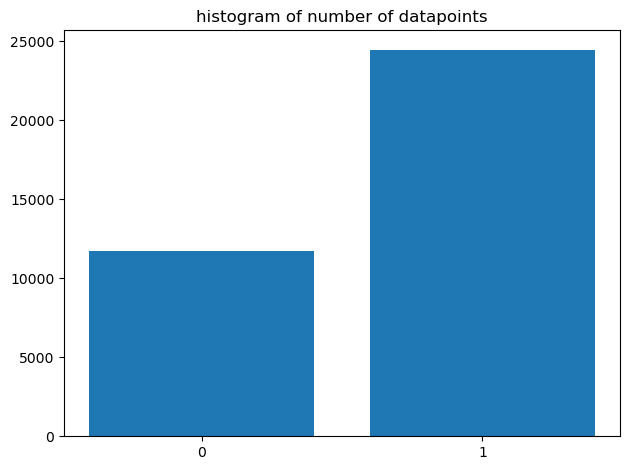

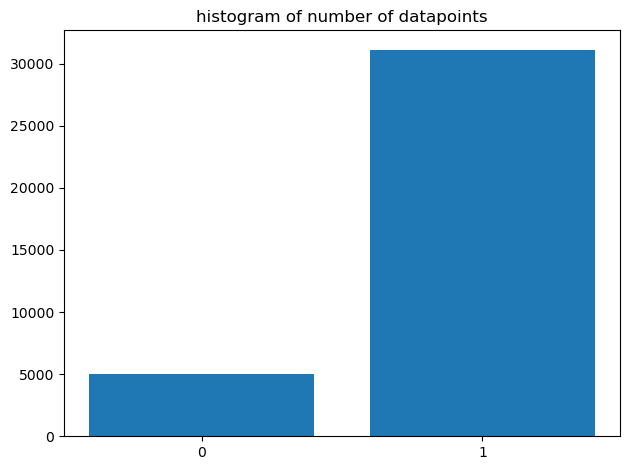

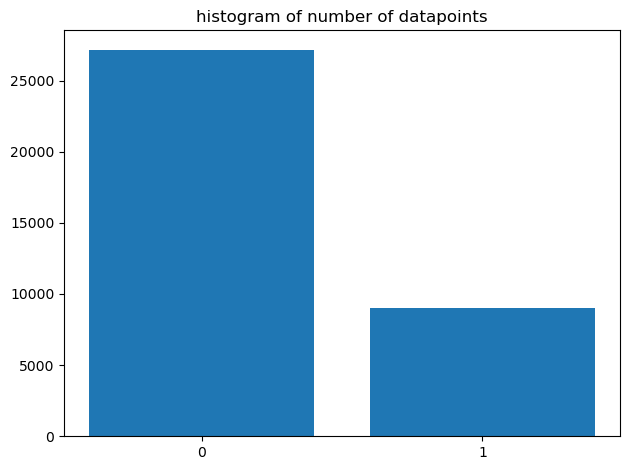

In [9]:
features = ['sex', 'race', 'Probability']
for index, feature in enumerate(features):
    plot_categs(dataset, feature, fignum=index+1)

In [10]:
countarr = [counts[0][0][0], counts[0][0][1], counts[0][1][0], counts[0][1][1], counts[1][0][0], counts[1][0][1], counts[1][1][0], counts[1][1][1]]
print(countarr)

countlabels = ['N-F-NW', 'N-F-W', 'N-M-NW', 'N-M-W', 'P-F-NW', 'P-F-W', 'P-M-NW', 'P-M-W']
print(countlabels)

[2056, 8308, 2197, 14608, 168, 1184, 630, 7027]
['N-F-NW', 'N-F-W', 'N-M-NW', 'N-M-W', 'P-F-NW', 'P-F-W', 'P-M-NW', 'P-M-W']


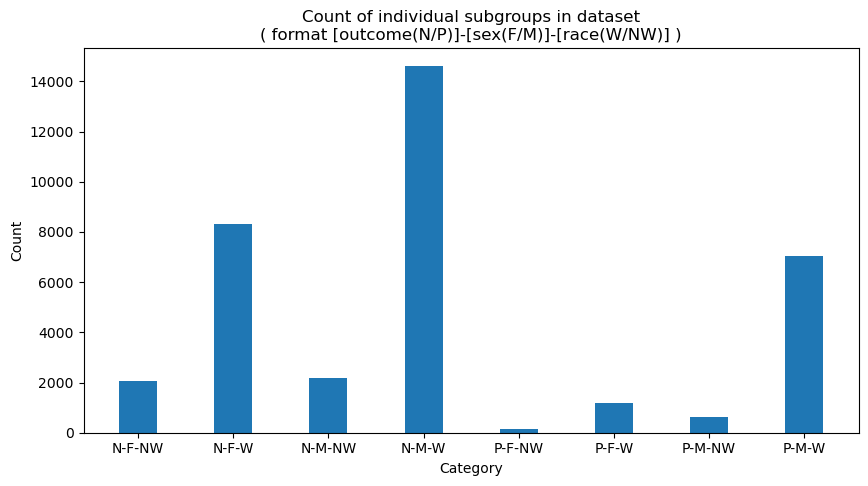

In [13]:
fig = plt.figure(figsize = (10, 5))

plt.bar(countlabels, countarr, width=0.4)

plt.title('Count of individual subgroups in dataset\n( format [outcome(N/P)]-[sex(F/M)]-[race(W/NW)] )')
plt.xlabel('Category')
plt.ylabel('Count')


plt.show()